# This script includes the following points:

Step 1. Importing the libraries and data

Step 3. Histogram of the order hour of the day

Step 4. Bar chart of the loyalty distribution

Step 5. Line chart of prices and order hour

Step 6. Line chart of age and number of dependants

Step 7. Scatterplot of age and spending power (income)

Step 8. Exporting the graphs

# Step 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
path = r'/Users/buketoztekin/Documents/Instacart Basket Analysis/'
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl')
orders_products_all = pd.read_pickle(file_path)

In [4]:
orders_products_all.head()

,user_id,gender,state,age,date_joined,number_of_dependants,family_status,income,product_id,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spender_flag,purchase_frequency,frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low-range product,Regularly busy,Slowest days,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer


# Step 3. Histogram of the order hour of the day

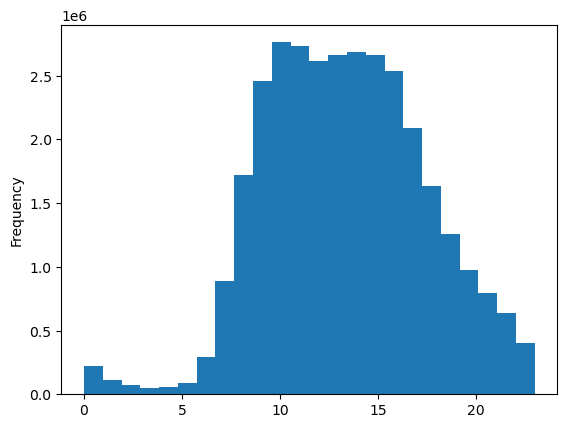

In [3]:
#Creating a histogram for order_hour_of_day column
hist = orders_products_all['order_hour_of_day'].plot.hist(bins = 24)


This histogram shows the busiest hours of the day, when the most amount of orders are places. According to the histogram, the peak time of the day falls between around 10 and 15 o'clock. At night and early morning hours, the order frequency is the lowest. Also after 15, order frequency tents to drop consistently.

# Step 4. Bar chart of the loyalty distribution

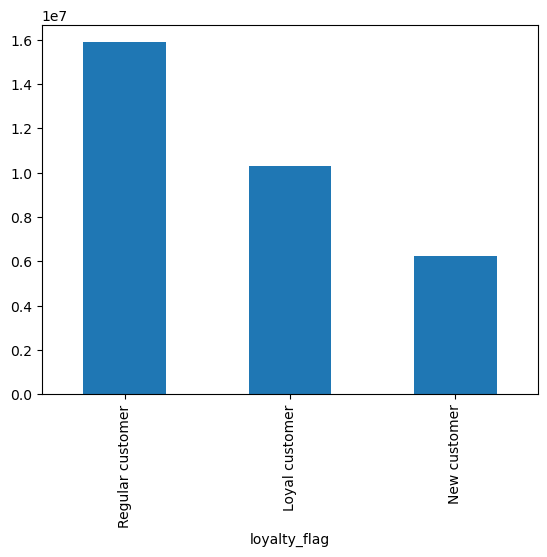

In [20]:
#Creating a bar chart for the loyalty groups
bar = orders_products_all['loyalty_flag'].value_counts().plot.bar()


In [17]:
#Assign colors to each bar
colors = ['skyblue', 'lightgreen', 'salmon']

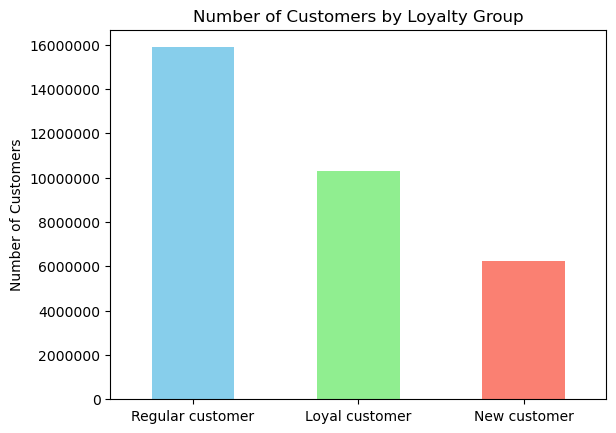

In [19]:
# Create the bar chart for the loyalty groups
bar_2 = orders_products_all['loyalty_flag'].value_counts().plot.bar(color=colors)

# Set the x-axis labels to be horizontal
plt.xticks(rotation=0)

# Add labels and title for clarity
plt.xlabel('')
plt.ylabel('Number of Customers')
plt.title('Number of Customers by Loyalty Group')

# Define a function to format the y-axis tick labels
def thousands(x, pos):
    'The two args are the value and tick position'
    return '%1.0f' % (x)

# Apply the formatter to the y-axis
bar_2.yaxis.set_major_formatter(FuncFormatter(thousands))

# Show the plot
plt.show()

# Step 5. Line chart of prices and order hour

In [4]:
# Create a random sample by generating a seed
np.random.seed(4)

In [5]:
# Create a dev list based on the data split we want (70/30)
dev = np.random.rand(len(orders_products_all)) <= 0.7

In [6]:
# Split the dataframe into two samples
big = orders_products_all[dev]
small = orders_products_all[~dev]

In [7]:
# Compare the dataframe length to the sum of the big and small samples
len(orders_products_all)

32404859

In [8]:
len(big) + len(small)

32404859

In [9]:
# Reduce the samples to only the columns needed
orders_products_all_2 = small [['order_hour_of_day','prices']]

In [10]:
# Check the subset of the sample
orders_products_all_2.head(5)

,order_hour_of_day,prices
0,9,9.0
2,15,9.0
3,9,4.3
6,9,4.3
10,9,4.0


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


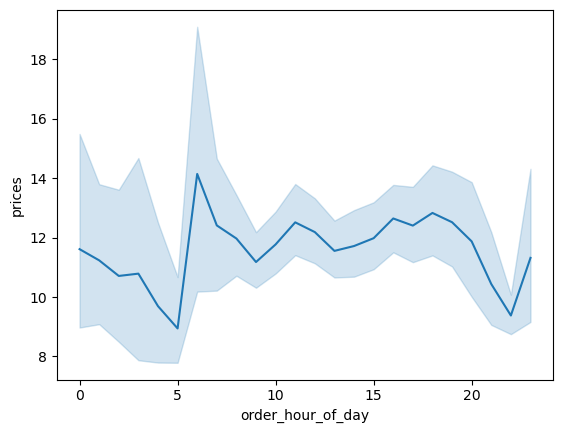

In [12]:
# Create a line chart
line = sns.lineplot(data = orders_products_all_2, x = 'order_hour_of_day',y = 'prices')

According to the line chart above, we can see that people tend to order more expensive items before 6-7 AM. The lowest prices are ordered starting from 20 and the prices dip at 5 AM.

# Step 6. Line chart of age and number of dependants

In [13]:
# Reduce the samples to only the columns needed
orders_products_all_3 = small [['age','number_of_dependants']]

In [19]:
# Check the subset of the sample
orders_products_all_3.head(5)

,age,number_of_dependants
0,48,3
2,48,3
3,48,3
6,48,3
10,48,3


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


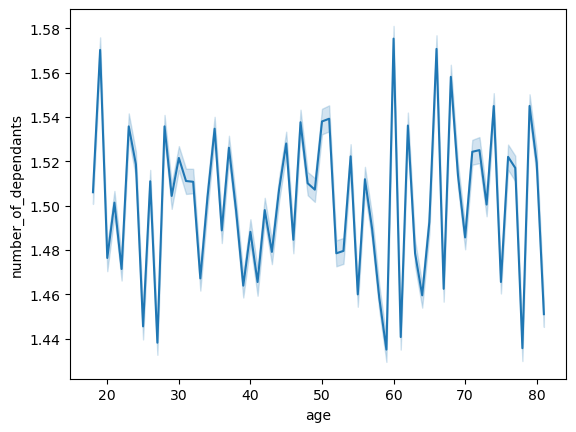

In [15]:
line_2 = sns.lineplot(data = orders_products_all_3, x = 'age',y = 'number_of_dependants')

From the chart above, it is not possible to draw a conclusion about how age and number of dependants can be related. There seems to be no pattern.

# Step 7. Scatterplot of age and spending power (income)

In [21]:
# Reduce the samples to only the columns needed
orders_products_all_4 = small [['age','income']]

In [22]:
# Check the subset of the sample
orders_products_all_4.head(5)

,age,income
0,48,165665
2,48,165665
3,48,165665
6,48,165665
10,48,165665


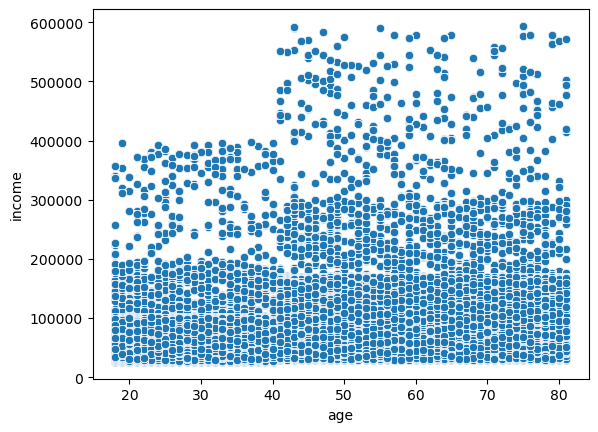

In [26]:
#Create a scatterplot of the sample
scatterplot = sns.scatterplot(x = 'age', y = 'income',data = orders_products_all_4)

Despite the variation in incomes across all ages, it's evident that higher income groups (above 400000) are only found among individuals over 40 years old. For all age groups, the majority of people have incomes below 200000.

Among those aged 40 to 80, there is a high density of individuals earning between 20000 and 300000, with those earning above 300000 being more dispersed. For the 20 to 40 age group, incomes between 200000 and 400000 are also more scattered.

# Step 8. Exporting the graphs

In [27]:
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_frequency.png'))

In [28]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution.png'))

In [29]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_and_hours_of_the_day.png'))

In [30]:
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_and_number_of_dependants.png'))

In [31]:
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_and_age.png'))

In [21]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_distribution2.png'))